In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.ticker import MultipleLocator

import nn_model.globals
from response_analyzer import ResponseAnalyzer
from results_plotter import ResultsPlotter


In [ ]:
train_spikes_dir = f"/home/beinhaud/diplomka/mcs-source/dataset/train_dataset/compressed_spikes/trimmed/size_{nn_model.globals.TIME_STEP}"
test_spikes_dir = f"/home/beinhaud/diplomka/mcs-source/dataset/test_dataset/compressed_spikes/trimmed/size_{nn_model.globals.TIME_STEP}"

responses_dir = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/full_evaluation_results/model-10_step-20_lr-1e-05_complex_residual-False_neuron-layers-5_neuron-size-10_num-hidden-time-steps-1"
dnn_responses_filename = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/neuron_model_responses/model-10_step-20_lr-1e-05_complex_residual-False_neuron-layers-5_neuron-size-10_num-hidden-time-steps-1.pth"

neuron_ids_path = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_subsets/neurons/model_size_10_subset_10.pkl"
images_ids_path = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_subsets/experiments/experiments_subset_10.pkl"

response_analyzer = ResponseAnalyzer(train_spikes_dir, test_spikes_dir, responses_dir, dnn_responses_filename, neuron_ids_path)#, images_ids_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/full_evaluation_results/model-10_step-20_lr-1.0e-05_complex_residual-False_neuron-layers-5_neuron-size-10_num-hidden-time-steps-1'

  0%|          | 0/90 [00:00<?, ?it/s]

100%|██████████| 90/90 [00:13<00:00,  6.84it/s]


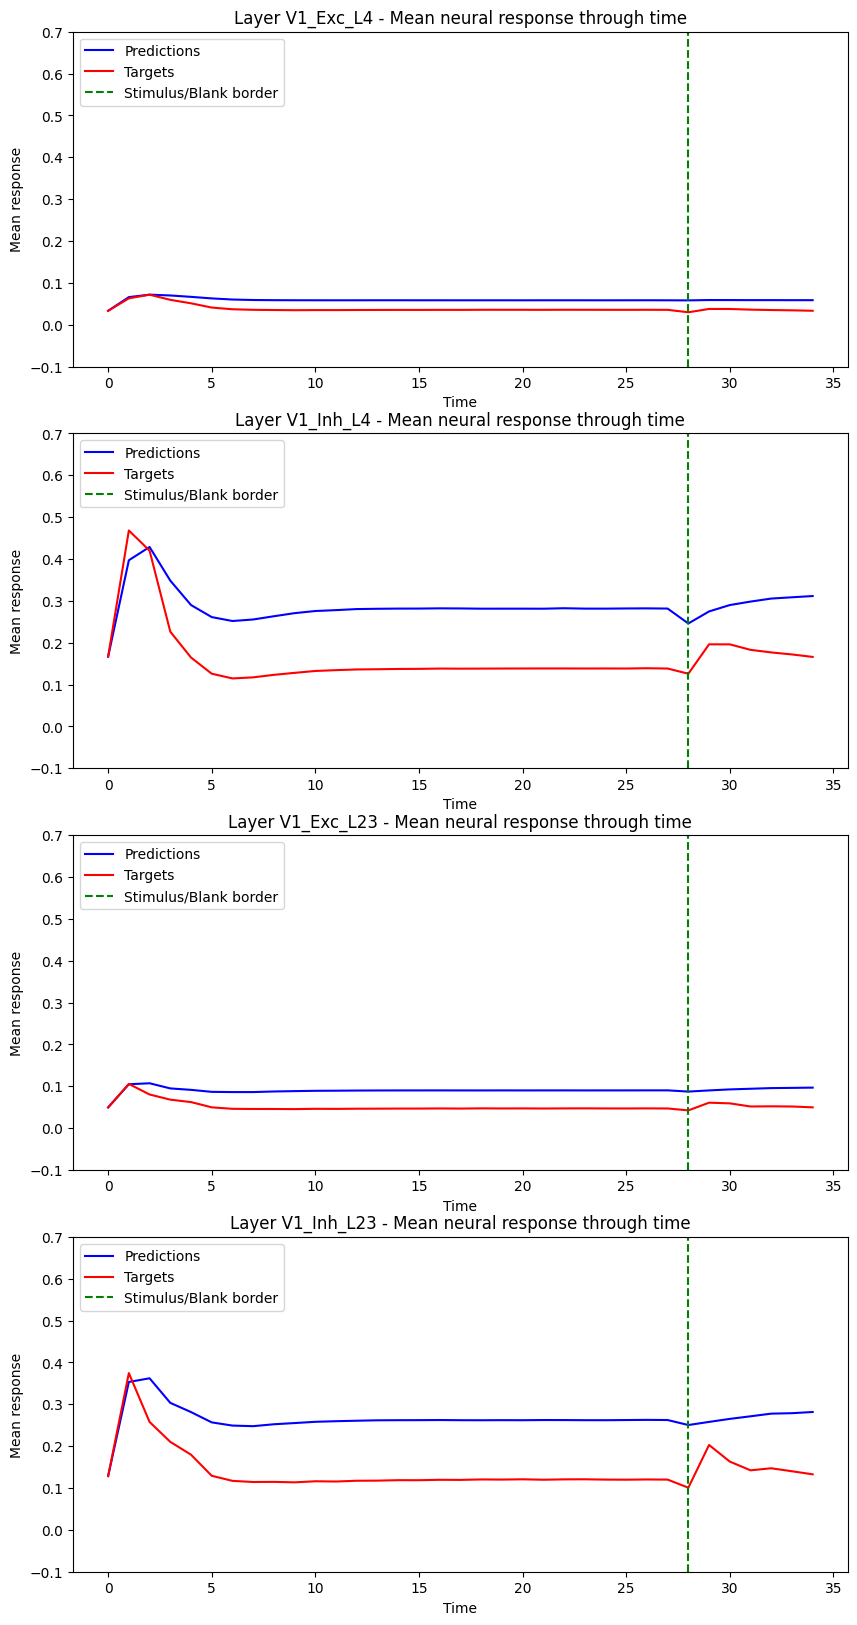

In [ ]:
response_analyzer.get_mean_from_evaluated_data()
ResultsPlotter.plot_mean_layer_data(response_analyzer.mean_layer_responses, True, y_range=(-0.1, 0.7), save_fig=True)

In [ ]:
# response_analyzer.get_rnn_responses_to_neuron_responses(subset=1)

In [ ]:
# dnn_responses_filename = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/neuron_model_responses/model-10_step-20_lr-1e-05_complex_residual-True_neuron-layers-5_neuron-size-10_num-hidden-time-steps-1.pth"

# dnn_responses = None
# with open(dnn_responses_filename, "rb") as f:
#     dnn_responses = pickle.load(f)
dnn_responses = response_analyzer.dnn_responses

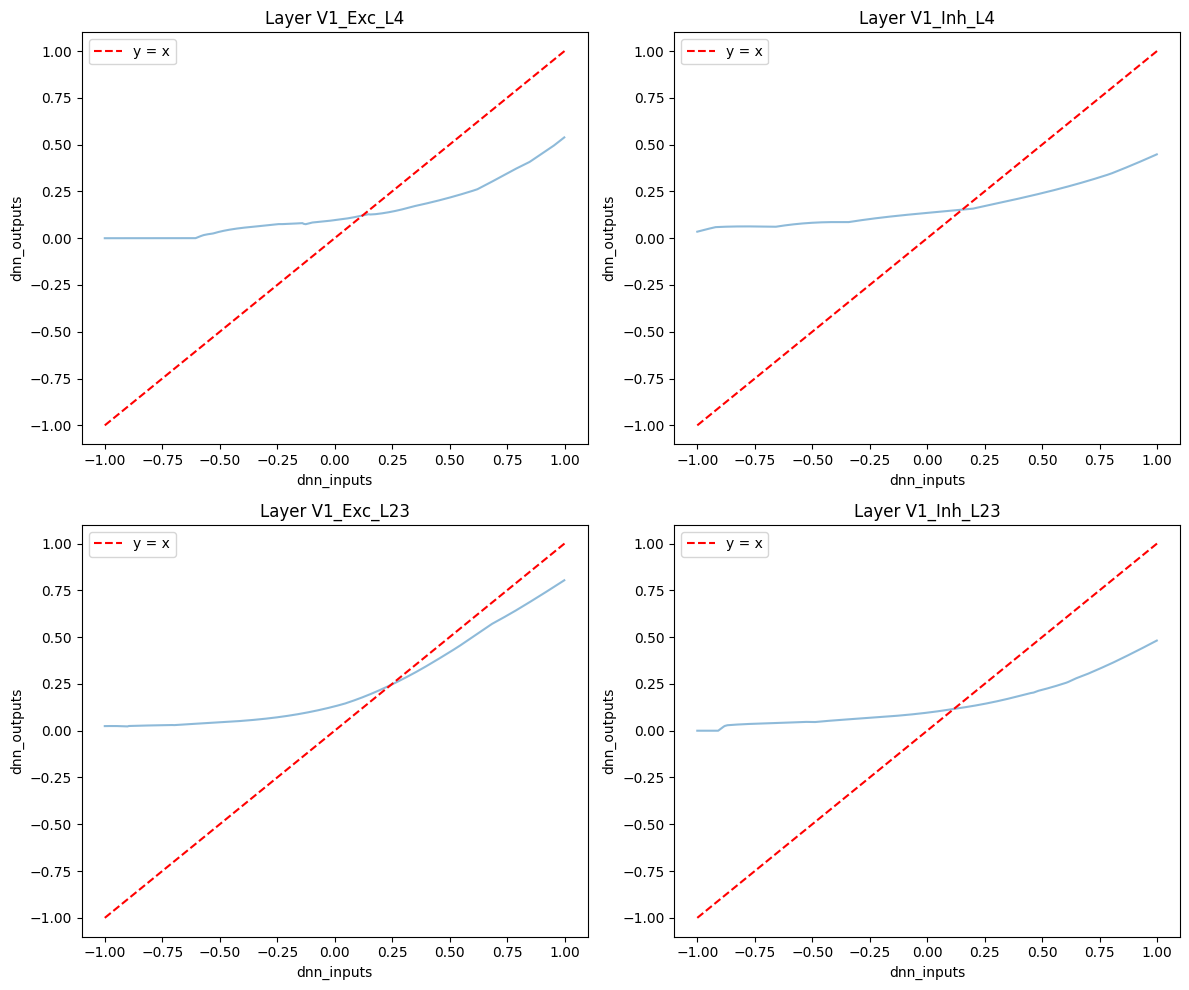

In [ ]:
# Plot separate DNN module responses.
ResultsPlotter.plot_dnn_module_responses_separate(dnn_responses, save_fig=True)

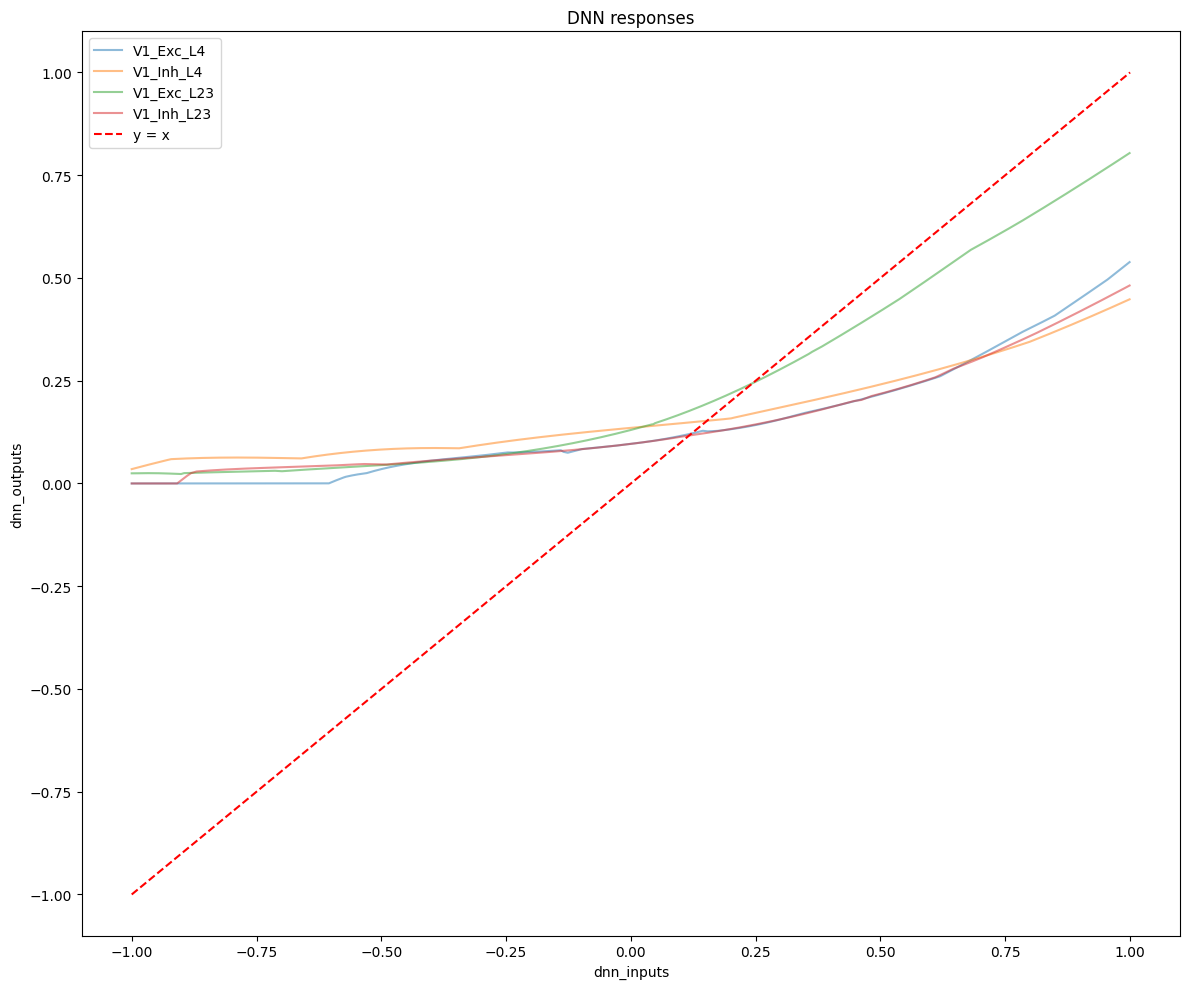

In [ ]:
# Plot DNN responses for all layers together.
ResultsPlotter.plot_dnn_module_responses_together(dnn_responses, save_fig=True)

  2%|▏         | 2/90 [00:58<43:06, 29.39s/it]


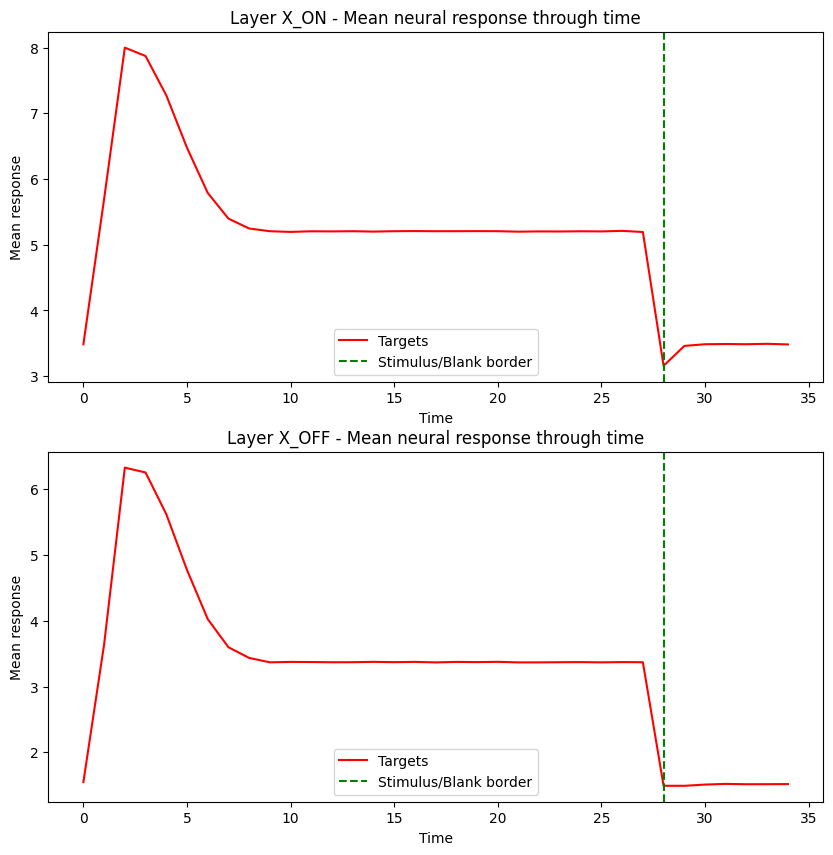

In [ ]:
# Plot input data
response_analyzer.get_original_data_mean_over_time(subset=2)
ResultsPlotter.plot_mean_layer_data(response_analyzer.mean_input_layer_responses, include_predictions=False)